# Time series analysis

This practical is based on the blog post:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#

here we're going to reproduce that post.

## Getting started

Normally, the blog site requires you to log in to see the beginning of the tutorial. We have provided that bit of code below so you don't need an account.


## Download and prepare data

In [1]:
from statsmodels.tsa import seasonal
import matplotlib
%matplotlib inline

### Load the data

In [2]:
import pandas as pd
data = pd.read_csv('AirPassengers.csv')
data.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


You never go wrong with an initial plot:

<AxesSubplot:>

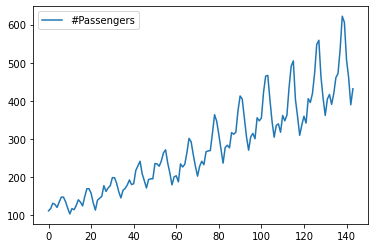

In [3]:
data.plot()

Notice that the x-axis has no label and doesn't seem to parse the month info.

Let's look at the datatypes:

In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

`Month` is an object, but it should be a date. Let's convert it:

In [5]:
data_ind = pd.DatetimeIndex(data['Month'])
data_ind

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now we need to set this as the index of the DataFrame:

In [6]:
data['Month'] = data_ind
data.set_index('Month')
print(data.dtypes)
data


Month          datetime64[ns]
#Passengers             int64
dtype: object


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Finally, let's plot it again:

<AxesSubplot:>

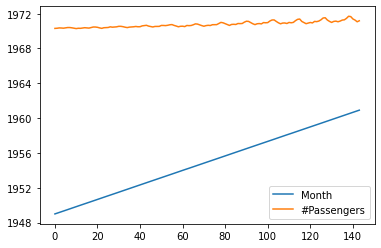

In [7]:
data.plot()

Notice how the month is now automatically annotated on the X-Axis, because we used the proper format.

## Over to you!!

Go to the [blog post](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#) and work through the topics provided there, in the following order:

### 3. How to Check Stationarity of a Time Series?

### ADD YOUR CODE HERE 

In [8]:
# In order to check the stationality, we will be using the rolling statistics plot along with Dickey-Fuller test results. 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [9]:
import matplotlib.pyplot as plt
ts = data["#Passengers"] 
ts.head(10)

0    112
1    118
2    132
3    129
4    121
5    135
6    148
7    148
8    136
9    119
Name: #Passengers, dtype: int64

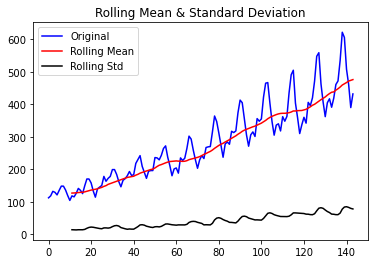

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
test_stationarity(ts)

### 4. How to make a Time Series Stationary?

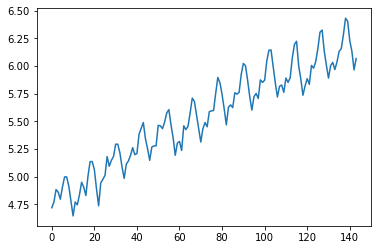

In [11]:
### add your code here...
import numpy as np
ts_log = np.log(ts)
plt.plot(ts_log)
### estimating and eliminating trend 

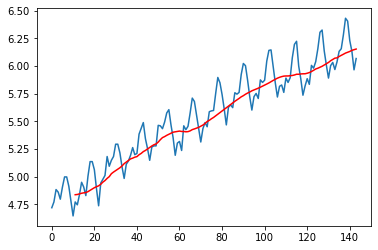

In [12]:
### moving average
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [13]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.065494
Name: #Passengers, dtype: float64

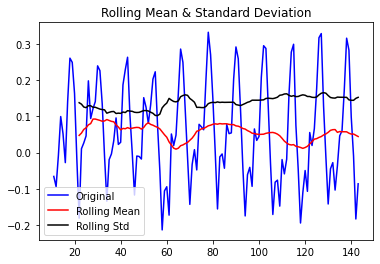

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
#dropping the nan value, and checking our plots to test stationarity, we have:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

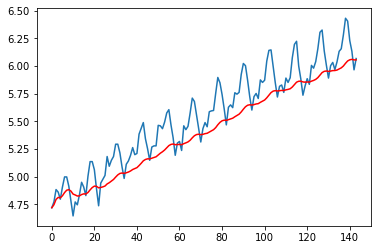

In [15]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

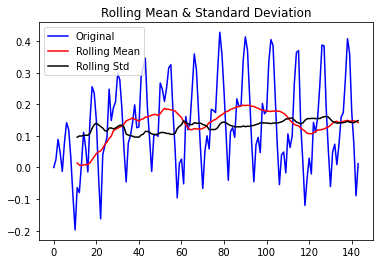

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

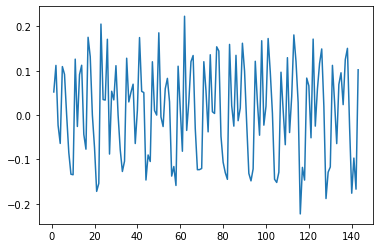

In [17]:
# eliminating trend and seasonality through difference method we have:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

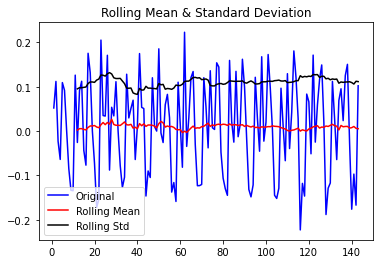

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
# verifying if the trends have been removed through our plots we have
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

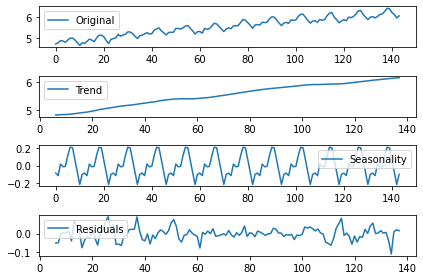

In [19]:
# eliminating trend and seasonality through decomposition method we have:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, period = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

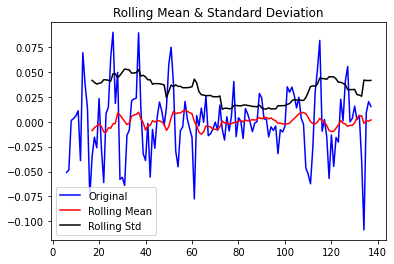

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [20]:
# checking the stationarity of residuals, we have:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### 5. Forecasting a Time Series

Note: The blog post uses an older version of `statsmodels`, where the ARIMA was implemented differently. If your `statsmodels` version is 12.0 or greater, then you will have to do two things:

1. where the blog post says `from statsmodels.tsa.arima_model import ARIMA`, you will have to use `from statsmodels.tsa.arima.model import ARIMA` (note the dot in place of the underscore)
2. where the blog post says `model = ARIMA(ts_log, order=(2, 1, 0))` or something similar, you must use `ts_log_diff` instead of `ts_log`, and the second parameter of the `order_` argmument must be zero instead of 1 (e.g. `order=(2,0,0)` instead of `order=(2,1,0)`. 

In [21]:
### add your code here
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

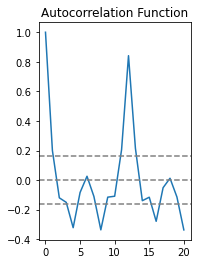

In [24]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

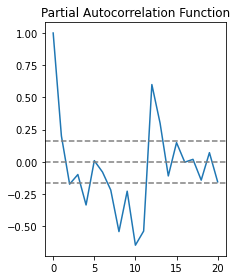

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 1.5023')

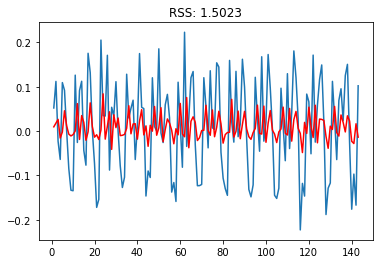

In [27]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 1.4721')

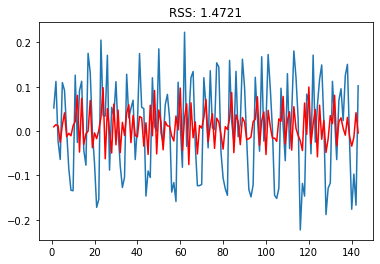

In [28]:
#using the MA model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 1.0292')

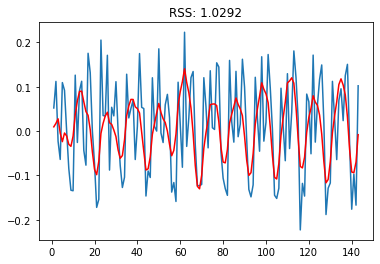

In [29]:
# using combined model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

1    0.009580
2    0.017491
3    0.027670
4   -0.004521
5   -0.023889
dtype: float64


In [31]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

1    0.009580
2    0.027071
3    0.054742
4    0.050221
5    0.026331
dtype: float64


In [32]:
predictions_ARIMA_log = pd.Series(ts_log.loc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0    4.718499
1    4.728079
2    4.745570
3    4.773241
4    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

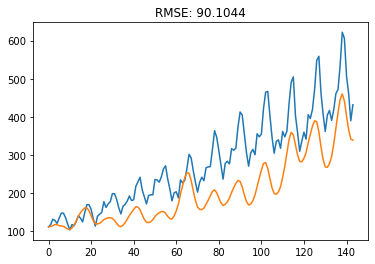

In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# That's it!

We leave out the part with R. 

You have successfully learnt how to check stationarity of a time series, how to make a timeseries stationary, and how to do a forecast. Congratulations!